In [2]:
import numpy as np
import pandas as pd
import scipy as sc
import scipy.fftpack
import pywt
import matplotlib.pyplot as plt
import cmath
%matplotlib inline

In [3]:
data_wisdm = pd.read_table("../data/WISDM/WISDM_ar_v1.1_raw_cleared.txt", delimiter=',')
data_wisdm.columns = ['id_user', 'activity', 'timestamp', 'x', 'y', 'z']


In [4]:
df_expert_wisdm = pd.read_csv("../data/features/expert_wisdm.csv")
df_ar_wisdm = pd.read_csv("../data/features/ar_wisdm.csv")
df_ssa_wisdm = pd.read_csv("../data/features/ssa_wisdm.csv")
df_fft_wisdm = pd.read_csv("../data/features/fft_wisdm.csv")
df_wvt_wisdm = pd.read_csv("../data/features/wvt_wisdm.csv")
df_all_wisdm = pd.read_csv("../data/features/all_wisdm.csv")


In [32]:
df_all_wisdm = pd.concat([df_expert_wisdm, 
                          df_ar_wisdm.drop('activity', axis=1),
                          df_ssa_wisdm.drop('activity',axis=1), 
                          df_fft_wisdm.drop('activity', axis=1)], axis = 1, verify_integrity=True)
#df_all_wisdm = df_all_wisdm.T.drop_duplicates().T


In [33]:
print('Expert: ', df_expert_wisdm.shape[1], '\nAR: ', df_ar_wisdm.shape[1],
      '\nSSA: ', df_ssa_wisdm.shape[1], '\nFFT: ', df_fft_wisdm.shape[1],
      '\nAll:', df_all_wisdm.shape[1])


Expert:  41 
AR:  64 
SSA:  61 
FFT:  121 
All: 284


In [35]:
import numpy
import GA
import pickle
import matplotlib.pyplot

In [38]:
data_inputs.shape

(4321, 229)

In [41]:
data_inputs = df_expert_wisdm.drop('activity', axis=1).values
data_outputs = df_expert_wisdm['activity'].values

num_samples = data_inputs.shape[0]
num_feature_elements = data_inputs.shape[1]
train_indices = numpy.arange(1, num_samples, 2)
test_indices = numpy.arange(0, num_samples, 2)
print("Number of training samples: ", train_indices.shape[0])
print("Number of test samples: ", test_indices.shape[0])

"""
Genetic algorithm parameters:
    Population size
    Mating pool size
    Number of mutations
"""

sol_per_pop = 220 # Population size.
num_parents_mating = 100 # Number of parents inside the mating pool.
num_mutations = 5 # Number of elements to mutate.
# Defining the population shape.
pop_shape = (sol_per_pop, num_feature_elements)
 
# Creating the initial population.
new_population = numpy.random.randint(low=0, high=2, size=pop_shape)
print(new_population.shape)
 
best_outputs = []
num_generations = 5

Number of training samples:  2160
Number of test samples:  2161
(220, 40)


In [42]:
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = GA.cal_pop_fitness(new_population, data_inputs, data_outputs, train_indices, test_indices)

    best_outputs.append(numpy.max(fitness))
    # The best result in the current iteration.
    print("Best result : ", best_outputs[-1])

    # Selecting the best parents in the population for mating.
    parents = GA.select_mating_pool(new_population, fitness, num_parents_mating)

    # Generating next generation using crossover.
    offspring_crossover = GA.crossover(parents, offspring_size=(pop_shape[0]-parents.shape[0], num_feature_elements))

    # Adding some variations to the offspring using mutation.
    offspring_mutation = GA.mutation(offspring_crossover, num_mutations=num_mutations)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

Generation :  0
Best result :  0.8616381304951412
Generation :  1
Best result :  0.8616381304951412
Generation :  2
Best result :  0.8616381304951412
Generation :  3
Best result :  0.8653401203146691
Generation :  4
Best result :  0.8662656177695511


best_match_idx :  0
best_solution :  [1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 1 1 0]
Selected indices :  [ 0  1  2  4  5  6  7  8 12 14 19 26 29 36 37 38]
Number of selected elements :  16
Best solution fitness :  0.8662656177695511


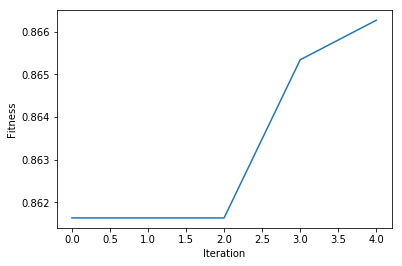

In [43]:
fitness = GA.cal_pop_fitness(new_population, data_inputs, data_outputs, train_indices, test_indices)

# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))[0]
best_match_idx = best_match_idx[0]

best_solution = new_population[best_match_idx, :]
best_solution_indices = numpy.where(best_solution == 1)[0]
best_solution_num_elements = best_solution_indices.shape[0]
best_solution_fitness = fitness[best_match_idx]

print("best_match_idx : ", best_match_idx)
print("best_solution : ", best_solution)
print("Selected indices : ", best_solution_indices)
print("Number of selected elements : ", best_solution_num_elements)
print("Best solution fitness : ", best_solution_fitness)

matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()